In [1]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

df=pd.read_csv("cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
df.shape

(47692, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [5]:
df["cyberbullying_type"].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [6]:
df["cyberbullying_type"].value_counts(ascending=False)

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cyberbullying Type')

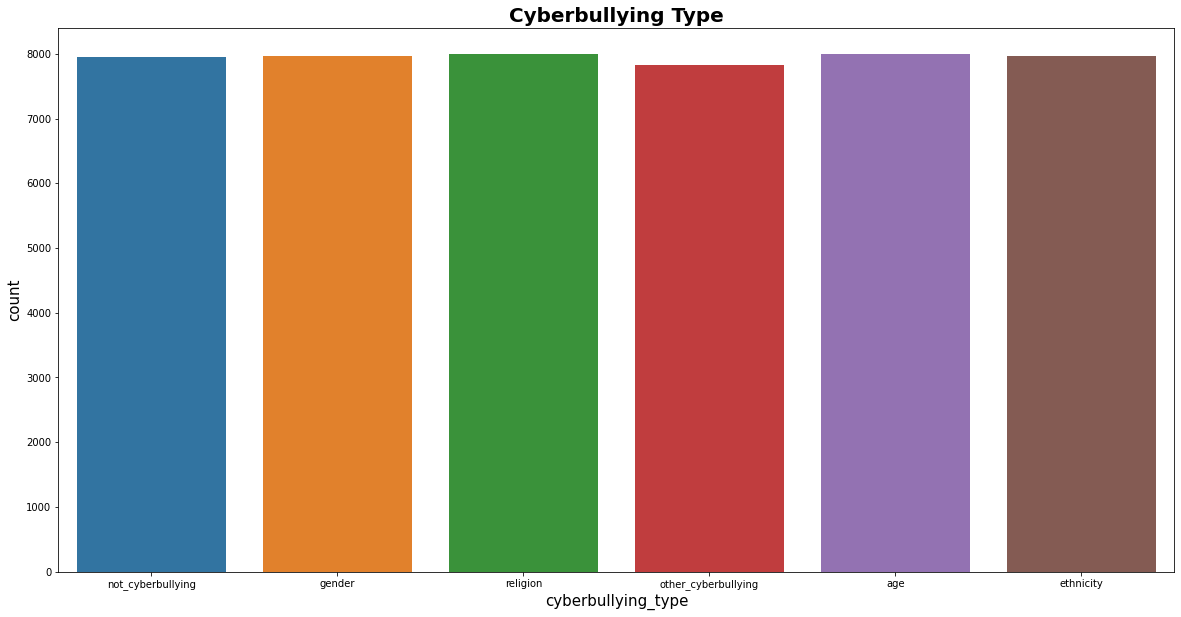

In [7]:
plt.figure(figsize=(20,10))
plt.xlabel("Type",fontsize=15)
plt.ylabel("Count",fontsize=15)
sns.countplot(df["cyberbullying_type"],data=df).set_title('Cyberbullying Type',fontsize=20,fontdict={"weight": "bold"})


In [8]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [9]:
df['cyberbullying_type'].replace({'not_cyberbullying':0, 'gender':1, 'religion':2, 'other_cyberbullying':3,
       'age':4, 'ethnicity':5},inplace=True)

In [10]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",5
47688,Turner did not withhold his disappointment. Tu...,5
47689,I swear to God. This dumb nigger bitch. I have...,5
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,5
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,5


In [11]:
#Data preprocessing

import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['tweet_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [12]:
corpus

['word katandandr food crapilici mkr',
 'aussietv white mkr theblock imacelebrityau today sunris studio neighbour wonderlandten etc',
 'xochitlsuckkk classi whore red velvet cupcak',
 'jason gio meh p thank head concern anoth angri dude twitter',
 'rudhoeenglish isi account pretend kurdish account like islam lie',
 'raja aab quickieleak ye test god good bad indiffer weird whatev prove god exist',
 'itu sekolah ya bukan tempat bulli ga jauh kaya neraka',
 'karma hope bite kat butt nasti mkr',
 'stockputout everyth mostli priest',
 'rebecca black drop school due bulli',
 'jord dead http co usqinyw gn',
 'bulli flush kd http twitvid com tnp',
 'ughhhh mkr',
 'rt kurdsnew turkish state kill children last year http co jlvke epw news googl eviricitoplulu uk rt eyide',
 'love best respons hotcak manag film non committ meh adolesc mkr',
 'yasmimcaci bferrarii parem de fazer bulli comigo uhahuah bando de preto',
 'sarinhacor victor maggi tadinhu de mim sofrendo bull viu mimi',
 'xabad dea kelse

In [13]:
# Creating Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
y=df['cyberbullying_type']

In [16]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [17]:
# Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred=spam_detect_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

score=accuracy_score(y_test,y_pred) #Accuracy = TP+TN/TP+FP+FN+TN
score=score*100

print('Accuracy of the model is {0:.2f}%'.format(score))

Accuracy of the model is 78.28%


Text(68.09375, 0.5, 'Actual Label')

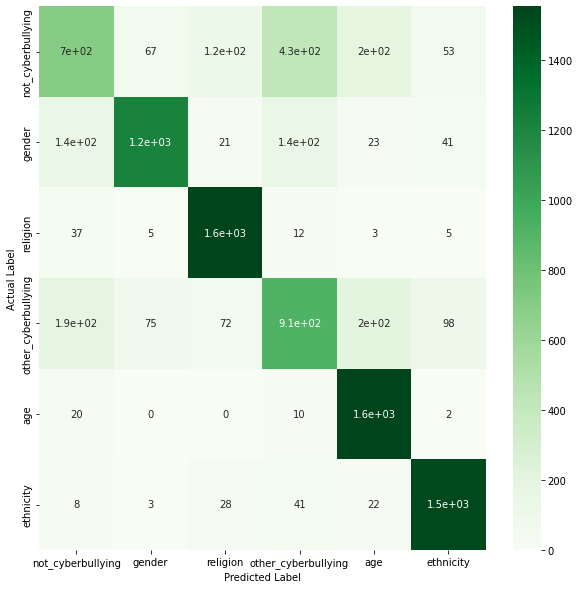

In [22]:
plt.figure(figsize=(10,10))

x_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']
y_axis_labels = ['not_cyberbullying','gender','religion','other_cyberbullying','age','ethnicity']

confusion_m=confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')